In [1]:
# Step 1: 1.Load Necessary Libraries


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Step 2.Load and Examine the Dataset

# Load dataset
data= pd.read_csv("creditcard (1).csv")

# Quick overview of the dataset
print(data.info())
print(data.describe())

# Check for class imbalance
print(data['Class'].value_counts(normalize=True))  

# 'Class' column contains labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

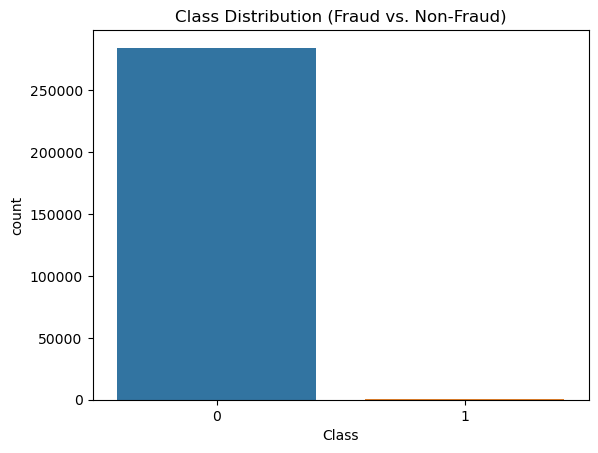

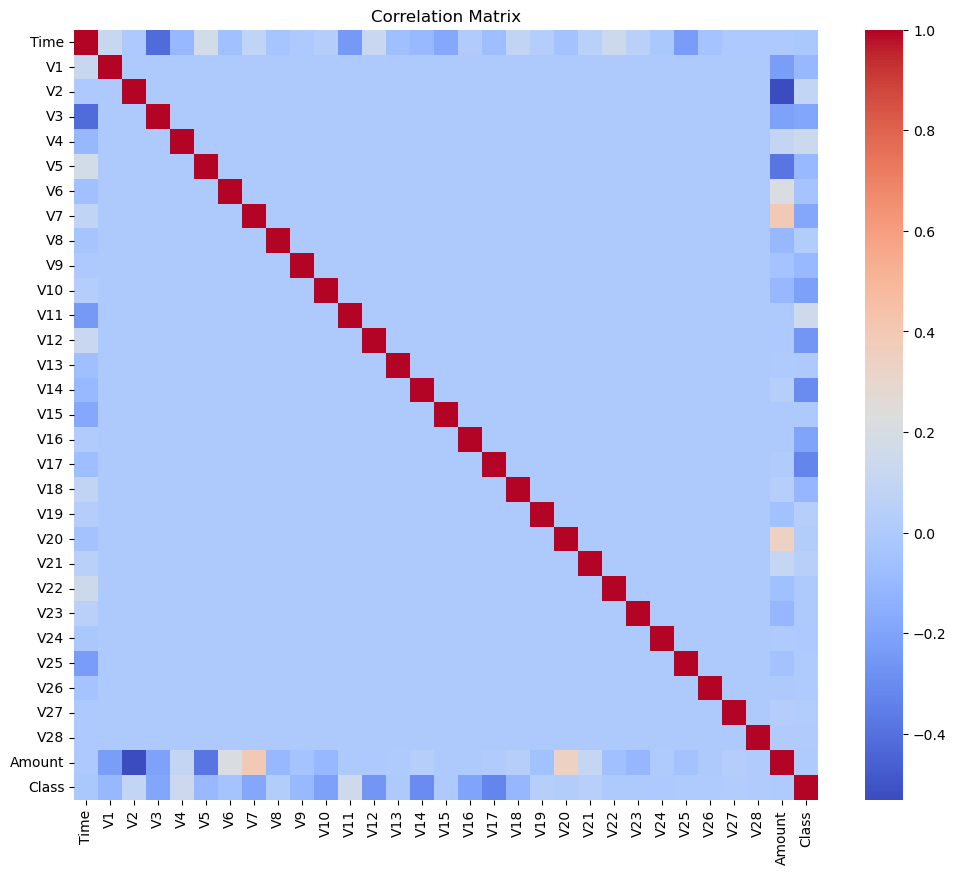

In [3]:
# Step 3.Exploratory Data Analysis (EDA)

#o	Visualize the distribution of both classes (fraudulent vs. non-fraudulent transactions).
#o	Check correlations among features, and plot feature distributions.


# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.show()


# Plot correlations
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


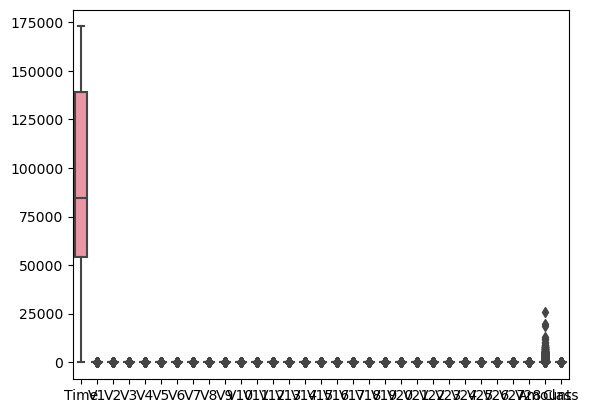

In [4]:
# Step 4.	Data Cleaning
#o	Check and handle any missing values, if present.
#o	Handle outliers where appropriate, possibly by capping/flooring extreme values for certain features.


# Check for missing values
print(data.isnull().sum())

# Outlier analysis (optional) - especially useful for continuous variables
sns.boxplot(data=data)
plt.show()

In [5]:
# step 5.	Data Preprocessing and Imbalance Handling
#o	Convert the Time feature into a more meaningful format if it’s not already.
#o	Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.


# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Use SMOTE for balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE, counts of label '1': {}".format(sum(y_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_res == 0)))

After SMOTE, counts of label '1': 284315
After SMOTE, counts of label '0': 284315


In [7]:
#Step 6 	Feature Engineering
#o	Here, you could engineer features based on domain knowledge (e.g., aggregating transaction times) or
#   select features that seem most relevant based on EDA.

data['Amount_log'] = np.log1p(data['Amount'])

In [8]:
# step 7.	Train/Test Split

# Split the balanced data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
# Step 8.	Model Selection and Training
#o	Start with a Random Forest classifier as a baseline model.
#    Later, you could try other models like Gradient Boosting, XGBoost, or Neural Networks.

# Model training

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)




In [ ]:
# step 9.	Model Evaluation
#o	Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# step 10.	Hyperparameter Tuning
#o	Use GridSearchCV or RandomizedSearchCV to optimize the model.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

In [ ]:
# step 11.	Deployment Plan
#o	Package the code into a pipeline and create a README file explaining the pipeline, installation, and usage.
#o	Optionally, export the model with joblib or pickle for deployment.



In [ ]:
#model Export

import joblib

# Save the trained model
joblib.dump(model, 'credit_fraud_detection_model.pkl')

# To load the model later
loaded_model = joblib.load('credit_fraud_detection_model.pkl')


In [ ]:
#2. Data Preprocessing Pipeline
#Define a pipeline for preprocessing the input data. Ensure that all transformations (e.g., feature scaling, encoding, SMOTE, feature engineering) are consistently applied.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalize features
    ('model', RandomForestClassifier(random_state=42))  # Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, 'credit_fraud_detection_model.pkl')


In [ ]:
#3. API or Service Integration

#Integrate the model into an API or web service so it can accept real-time or batch inputs.

from fastapi import FastAPI
import joblib
import pandas as pd

# Load the model
pipeline = joblib.load('fraud_detection_pipeline.pkl')

# Create a FastAPI instance
app = FastAPI()

@app.post("/predict/")
def predict(data: dict):
    # Convert input data to DataFrame
    input_data = pd.DataFrame([data])
    # Make prediction
    prediction = pipeline.predict(input_data)
    return {"prediction": int(prediction[0])}

# To run this, use: uvicorn script_name:app --reload


In [ ]:
#4. Testing the Deployment

import requests

# Test input data
test_data = {
    "feature1": 0.5,
    "feature2": 1.2,
    "feature3": 0.8,
    # Include all relevant features
}

# Send request to API
response = requests.post("http://127.0.0.1:8000/predict/", json=test_data)
print(response.json())
